In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file
data = pd.read_csv(r'C:\Users\sreeh\DSA\Data-sets\titanic_dataset.csv')

In [3]:
# getting and idea of how the data looks
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking how many records are there
data.shape

(891, 12)

In [5]:
# checking how many unique records PassengerId has
data['PassengerId'].nunique()

891

In [6]:
# as PassengerId is just like an index, we will drop it
data.drop('PassengerId', axis = 1, inplace = True)

In [7]:
# checking for null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# cabin has too many null values to off any data of importance 
# dropping cabin
data.drop('Cabin', axis =1, inplace =  True)

In [9]:
# let us see which are other columns with a lot of unqiue values
data['Ticket'].nunique()

681

In [10]:
# dropping the Ticket coulumn
data.drop('Ticket', axis =1, inplace = True)

In [11]:
# rather than checking for unique values in Name column, extracting the title in the name column
# save this title to create a Title column
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [12]:
# checking out the title values
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [13]:
# cheking the distribution of titles
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [14]:
# converting lesser used titles into title named other.
# also converting ms, mme, mlle into miss mrs and miss respectively
data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data['Title'] = data['Title'].replace('Mlle', 'Miss')

In [15]:
# using Title to fill out the missing values in age
data['Age'] = data.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))

In [16]:
# checking null values
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [17]:
# filling embarked with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [18]:
# concentrating on Fare column to check whether we should handle outliers.
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

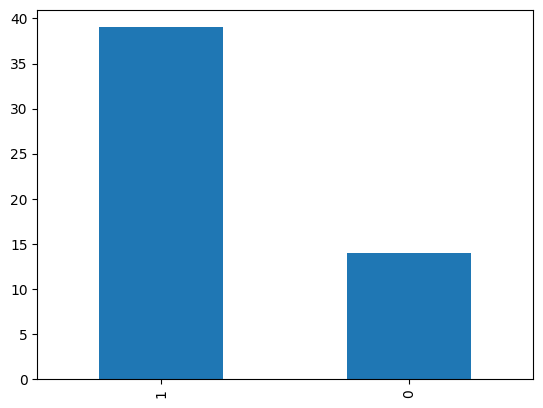

In [19]:
# creating a high fare datframe to check how fare affects survival rate and plotting a graph
high_fare = data[data['Fare']>100]
high_fare['Survived'].value_counts().plot.bar()
plt.show()

High passenger fare is correlated to high survival rates. So will not handle outliers in the fare column.

In [20]:
# using FamilySize instead of two colums Sibsp and Parch
data['FamilySize']  = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0


In [21]:
# checking columns 
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize'],
      dtype='object')

In [22]:
# removing unwanted columns
data.drop(['Name','SibSp','Parch','Title'], axis =1, inplace = True)

In [23]:
# converting into dependent and independent variables
x = data.drop(["Survived"],axis=1)
y = data["Survived"]

In [24]:
# label encoding the sex and embarked columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["Sex"] = le.fit_transform(x["Sex"])
x["Embarked"] = le.fit_transform(x["Embarked"])

In [25]:
# converting the resultant array back to a dataframe
x = pd.DataFrame(x, columns = ["Pclass","Sex","Age","Fare","Embarked","FamilySize"])

In [26]:
# using Standard Scaling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)
x = pd.DataFrame(x, columns = ["Pclass","Sex","Age","Fare","Embarked","Familysize"])

In [27]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### K Neighbors Classifier

In [28]:
# importing the class
from sklearn.neighbors import KNeighborsClassifier

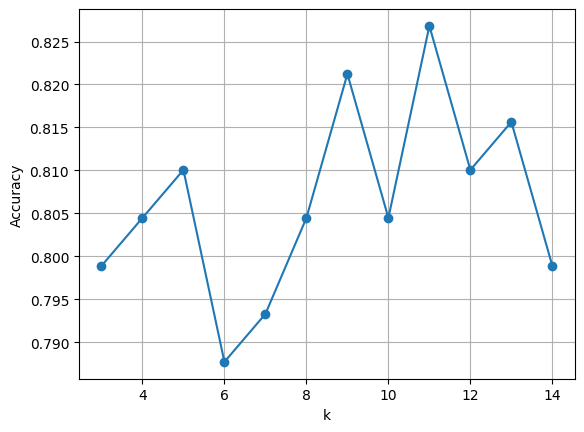

In [29]:
# running a small test to see which K gives the better accuracy
metric_k = []
neighbors = np.arange(3,15)
from sklearn.metrics import confusion_matrix,accuracy_score
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric ='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)
# plotting a graph to see the best performing k
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Using K as 11

In [30]:
# creating a knn model
classifier = KNeighborsClassifier(n_neighbors = 11,metric ='euclidean')
classifier = classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [31]:
# displaying the test scores
print("Accuracy = ",accuracy_score(y_test,y_predictions))
print(confusion_matrix(y_test,y_predictions))

Accuracy =  0.8268156424581006
[[93 12]
 [19 55]]


### SVM

In [32]:
# creating SVM Model
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf = svmclf.fit(x_train,y_train)
y_predictions = svmclf.predict(x_test)

In [33]:
# displaying the accuracy score
print("Accuracy = ",accuracy_score(y_test,y_predictions))
print(confusion_matrix(y_test,y_predictions))

Accuracy =  0.7821229050279329
[[88 17]
 [22 52]]


In [34]:
# import K-Fold and Stratified Kfold libraries and creating an instance of each
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kfold_validator = KFold(20)
skfold_validator = StratifiedKFold(n_splits=20)

### K-Fold KNN

In [35]:
# doing K-Fold validation on the previous knn model
cv_result = cross_val_score(classifier,x,y,cv =kfold_validator)

In [36]:
# displaying the average of the result.
print("The average result is ",np.mean(cv_result))

The average result is  0.8182070707070708


### K-FOLD stratified KNN

In [37]:
# doing stratified K-Fold on th previous knn model
cv_result = cross_val_score(classifier,x,y,cv =skfold_validator)

In [38]:
# displaying the average of the result.
print("The average result is ",np.mean(cv_result))

The average result is  0.8204545454545455


### K-FOLD SVM

In [39]:
# doing K-Fold validation on the previous svm model
cv_result = cross_val_score(svmclf,x,y,cv =kfold_validator)

In [40]:
# displaying the average of the result.
print("The average result is ",np.mean(cv_result))

The average result is  0.7865909090909091


### K-Fold stratified SVM

In [41]:
# doing stratified K-Fold validation on the previous svm model
cv_result = cross_val_score(svmclf,x,y,cv =skfold_validator)

In [42]:
print("The average result is ",np.mean(cv_result))

The average result is  0.7865656565656565


#### From the above results we can observe that K-Fold stratification for the knn model gave the best accuracy of 0.82